In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py,os,glob

In [2]:
 # ls -hrtl /UserData/maddalena/sacla2022/03-h5analysis/

In [4]:
run=1192478
pathSave='/UserData/maddalena/sacla2022/03-h5analysis/'
os.chdir(pathSave)
files = glob.glob(f"IqPhi_{run}*.h5")

f = h5py.File(files[0],'r')
q = f['q'][:]
Phi = f['phi'][:]
I2d = []
for file in files[1:]:
    f = h5py.File(pathSave+file,'r')
    I2d            += f['I']  

In [23]:
# parameters for loading
def find_liquid_and_save(run,qrange,Phirange,hit_thrs=150, save=True):
    pathSave='/UserData/maddalena/sacla2022/03-h5analysis/'
    
    os.chdir(pathSave)
    files = glob.glob(f"IqPhi_{run}*.h5")
    f = h5py.File(files[0],'r')
    q = f['q'][:]
    Phi = f['phi'][:]

    I2d = []
    for file in files[1:]:
        f = h5py.File(file,'r')
        I2d            += f['I']  

    # get 1d I
    I2d=np.array(I2d)
    I2d[I2d==0]=np.nan
    I=np.nanmean(I2d[:,Phirange,:],axis=1)

    #Hist of intensity not on the water peaks
    plt.figure()
    plt.hist(np.mean(I[:, qrange], axis=1))
    plt.axvline(x=hit_thrs, c='r')
    plt.xlabel('mean I')
    plt.ylabel('f(mean I)')
    plt.yscale('log')
    
    # definition of hits and miss
    miss = (np.mean(I[:,qrange],axis=1)>1)&(np.mean(I[:,qrange],axis=1)<50)&(np.mean(I[:,:],axis=1)!=0)
    hits = (np.mean(I[:, qrange],axis=1)>hit_thrs)&(np.mean(I[:,qrange],axis=1)<=300)
    ice = (np.mean(I[:,qrange],axis=1)>=300)
    
    I_hits = I[hits,:]
    
    #print results
    
    #print(f'number of ice ={sum(ice)}')
    print(f'number of water= {sum(hits)}')
    print(f'number of bkg ={sum(miss)}' )
    #print(f'droplet hit rate = {(sum(hits)+sum(ice))/len(hits)}')
    print(f'liquid hit rate = {(sum(hits))/len(hits)*100:.3f}%')
    print(f'ice hit rate = {sum(ice)/len(hits)}')
    
    #plot ave hits and miss
    if save:
        np.savez(f'/UserData/maddalena/sacla2022/05-processed_I/water_{run}.npz',
                 hit_rate=(sum(hits))/np.size(I2d,0),
                 q=q,
                 I=np.mean(I[hits,:],axis=0) - np.mean(I[miss,:],axis=0))
                 # I = Iq_norm - Iq_bkg)
    

run 1192692
number of water= 0
number of bkg =9000
liquid hit rate = 0.000%
ice hit rate = 0.0


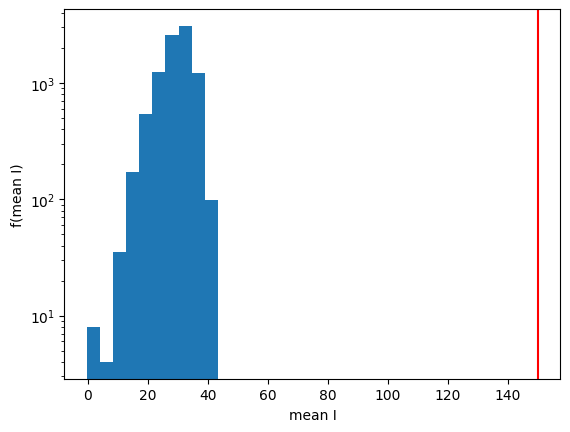

In [96]:
# runs=np.arange(1192421,1192427)
# runs = [1192430, 1192434, 1192437, 1192442, 1192446, 1192451, 1192460]
#runs = [1192498,1192499]
# runs=  [1192460,1192463,1192466,1192470,1192492]
#runs = [1192430,1192431,1192433,1192434,1192435,1192437,1192438,1192439,1192440,1192442,1192443,1192444,1192446,
#        1192447,1192448,1192450,1192451,1192452,1192453,1192454,1192496,1192497,1192498,1192499,1192460,1192463,1192470,1192492,
#        1192473,1192474,1192475,1192476,1192477,1192478,1192479,1192480,1192481,1192503,1192504,1192506,1192507,1192510,1192511,1192512,] 
# runs = [1192527,1192528,1192529,1192530,1192532,1192533]
# runs = np.arange(1192582,1192585)
runs = [1192692]
qrange = q>1.2
Phirange = Phi<181

for run in runs:
    print(f'run {run}')
    find_liquid_and_save(run,qrange,Phirange,hit_thrs=150,save=True)

# Random shit

### testing normalization with I0

In [ ]:
def find_liquid_and_save_test(run):
    
    path02 = '/UserData/maddalena/sacla2022/02-h5compression/'
    path03='/UserData/maddalena/sacla2022/03-h5analysis/'

    os.chdir(path02)
    files02 = glob.glob(f"{run}*.h5")

    os.chdir(path03)
    files03 = glob.glob(f"IqPhi_{run}*.h5")

    f3 = h5py.File(path03 + f'{files03[0]}', 'r')
    q = f3['q'][:]
    Phi = f3['phi'][:]
    I2d = []
    PulseEnergy = []

    
    for i in range(len(files02)):
        f3 = h5py.File(path03 + f'{files03[i]}', 'r')
        I2d += f3['I']
        
        f2 = h5py.File(path02 + f'{files02[i]}', 'r')
        PulseEnergy += f2[f'/run_{run}/event_info/bl_3/oh_2/bm_1_pulse_energy_in_joule']
        
    # get 1d I
    I2d = np.array(I2d)
    I2d[I2d==0] = np.nan
    I = np.nanmean(I2d[:,Phi>0,:],axis=1)
    
    PulseEnergy = np.array(PulseEnergy)

#     # Hist of intensity not on the water peaks
#     plt.figure()
#     plt.hist(np.mean(I[:, :], axis=1))
#     plt.axvline(x=150, c='r')
#     plt.xlabel('mean I')
#     plt.ylabel('f(mean I)')
#     plt.yscale('log')
    
    # definition of hits and miss
    miss = (np.mean(I[:,:],axis=1)<50)&(np.mean(I[:,:],axis=1)!=0)
    hits = (np.mean(I[:, :],axis=1)>150)&(np.mean(I[:,:],axis=1)<=1000)
    
    #print results
    #print(f'number of ice ={sum(ice)}')
    print(f'number of water = {sum(hits)}')
    print(f'number of bkg = {sum(miss)}' )
    #print(f'droplet hit rate = {(sum(hits)+sum(ice))/len(hits)}')
    print(f'liquid hit rate = {(sum(hits))/len(hits)}')
    #print(f'ice hit rate = {sum(ice)/len(hits)}')
    
    # working on
    PulseEnergy = np.nan_to_num(PulseEnergy, nan=1e-15)
    # print(sum(np.isnan(PulseEnergy)))
    
    Iq_hit = np.empty(shape=I[hits,:].shape )
    for i in range(I[hits,:].shape[0]):
        Iq_hit[i,:] = I[hits,:][i] / (PulseEnergy[hits][i]*1e6)  
        
    Iq_miss = np.empty(shape=I[miss,:].shape )
    for i in range(I[miss,:].shape[0]):
        Iq_miss[i,:] = I[miss,:][i] / (PulseEnergy[miss][i]*1e6)
    
    Iq_norm = np.average(Iq_hit, weights=np.trapz(I[hits,100:-3], axis=1), axis=0)
    Iq_bkg = np.average(Iq_miss, weights=np.trapz(I[miss,100:-3], axis=1), axis=0)
    
    plt.figure(figsize=(5,4))
    # weights = np.trapz(I[hits,100:-3], axis=1)
    # plt.plot(weights)
    plt.plot(q, Iq_norm)
    plt.plot(q, Iq_norm-Iq_bkg)
    plt.plot(q, Iq_bkg)
    plt.axvline(x=q[150])
    plt.show()
    # print(Iq_norm)
    
#     np.savez(f'/UserData/maddalena/sacla2022/05-processed_I/water_{run}_norm.npz',
#              hit_rate=(sum(hits))/len(hits),
#              q=q,
#              I = Iq_norm - Iq_bkg)
    
run = 1192431
find_liquid_and_save_test(run)   

run 1192430
number of water = 949
number of bkg = 1608
liquid hit rate = 0.09481466679988011


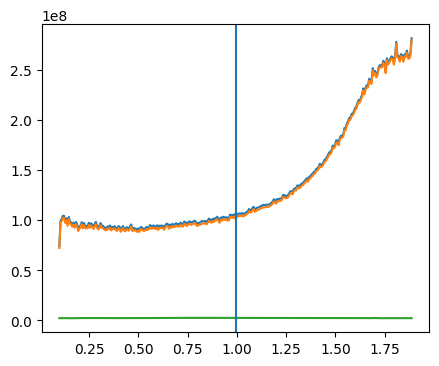

run 1192434
number of water = 981
number of bkg = 6331
liquid hit rate = 0.09801178938954941


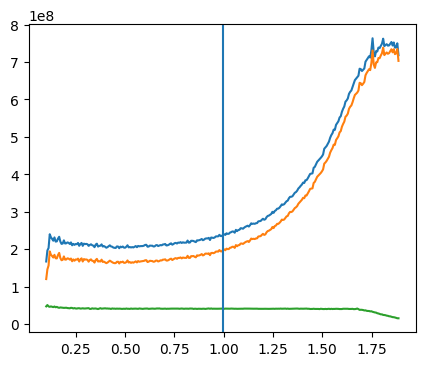

run 1192437
number of water = 879
number of bkg = 6560
liquid hit rate = 0.08782096113497852


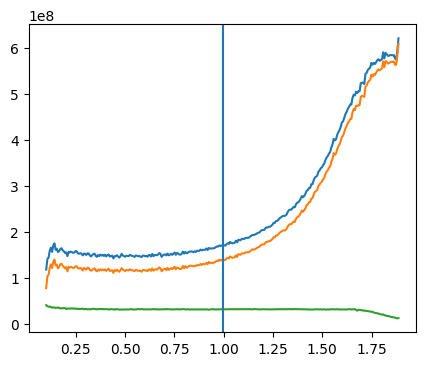

run 1192442
number of water = 177
number of bkg = 7872
liquid hit rate = 0.017684084324108302


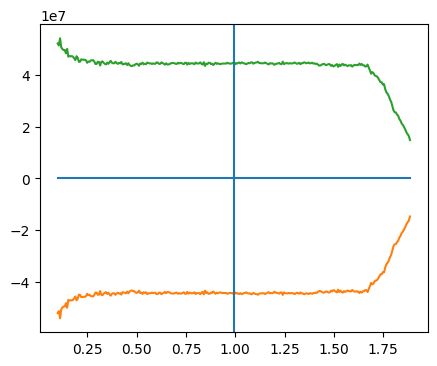

run 1192446
number of water = 149
number of bkg = 7857
liquid hit rate = 0.014886602058147668


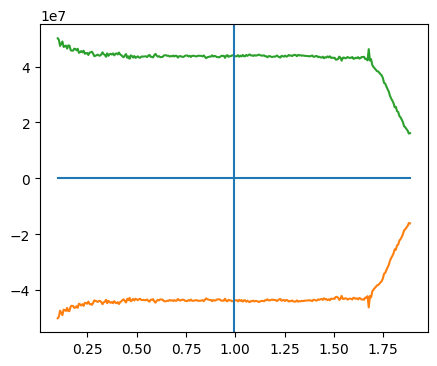

run 1192451
number of water = 49
number of bkg = 8859
liquid hit rate = 0.004895593965431112


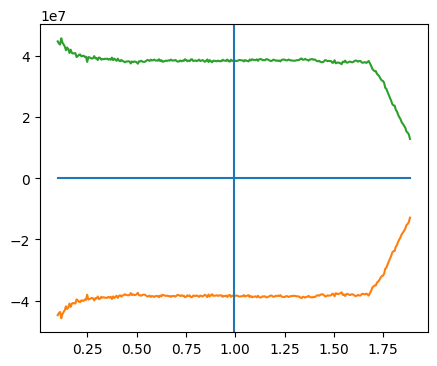

run 1192460
number of water = 13
number of bkg = 9581
liquid hit rate = 0.0012988310520531522


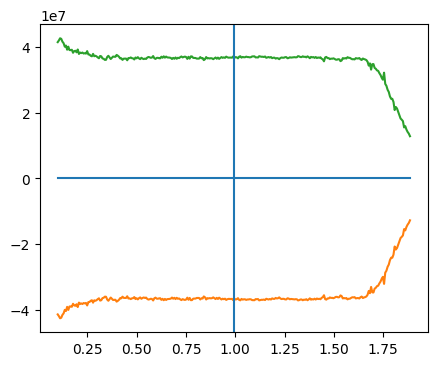

In [93]:
runs = [1192430, 1192434, 1192437, 1192442, 1192446, 1192451, 1192460]
# runs = [1192493]
for run in runs:
    print(f'run {run}')
    find_liquid_and_save_test(run)

# rest of the notebook

In [8]:
plt.figure()
plt.plot(q,np.mean(I[hits,:],axis=0),label='hits')
plt.plot(q,np.mean(I[miss,:],axis=0),label='miss')
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$')

plt.legend()
#plot ave hits - miss which should be water
plt.figure()
plt.plot(q,np.mean(I[hits,:],axis=0)-np.mean(I[miss,:],axis=0),label='water (hit-miss)')
# plt.xlim([1.5,2 ])
plt.grid('on')
plt.legend()

plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$')

NameError: name 'q' is not defined

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'max $I(1.2<q<2)$')

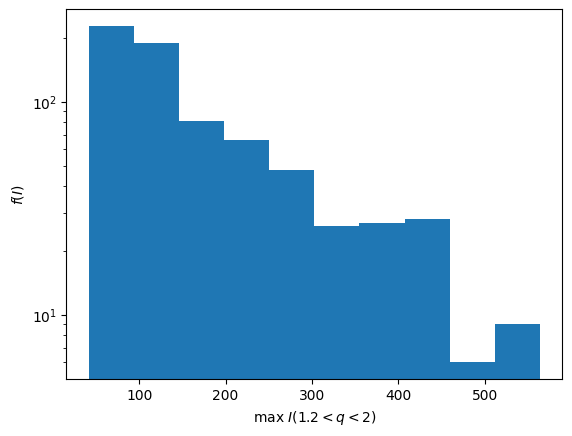

In [64]:
## histogram of the max in the intensity on the brag peak 
plt.figure()
plt.hist(np.max(I[:,(q>1.2)&(q<2.7)],axis=1) )
plt.yscale('log')
plt.ylabel(r'$f(I)$')
plt.xlabel(r'max $I(1.2<q<2)$')


/home/maddalena/drop/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/maddalena/drop/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


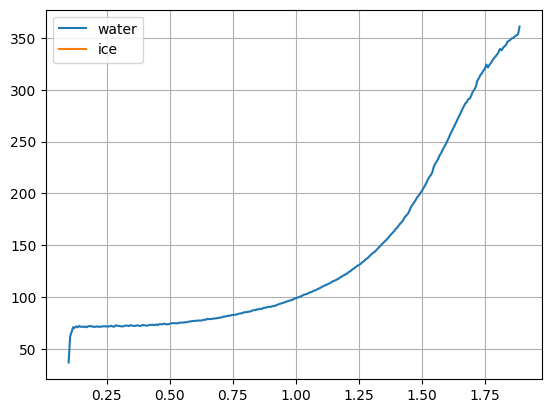

In [65]:
ice=(np.max(I[:,(q>1.)&(q<2.7)],axis=1)>800)&(np.max(I[:,(q>1.)&(q<2.7)],axis=1)<4300)
bkg=np.mean(I[miss,:],axis=0)
plt.figure()
plt.plot(q,np.mean(I[hits,:],axis=0)-bkg,label='water')
plt.plot(q,np.mean(I[ice,:],axis=0)-bkg,label='ice')
plt.grid('on')
plt.legend()

IndexError: index 33 is out of bounds for axis 0 with size 33

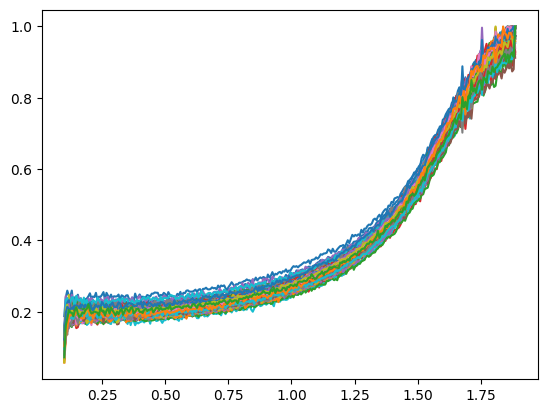

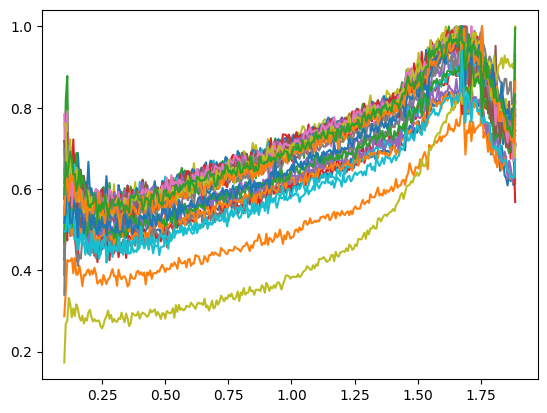

In [66]:
# plot all the liquids singularly

plt.figure()

bkg=np.mean(I[miss,:],axis=0)
I_hits=I[hits,:]
for i in range(np.size(I_hits,0)):
    I_corrected=I_hits[i,:]-bkg
    plt.plot(q,I_corrected/max(I_corrected))
    
    
# plot all the miss singularly
plt.figure()

I_miss=I[miss,:]
for i in range(np.size(I_hits,0)):
    I_corrected=I_miss[i,:]
    plt.plot(q,I_corrected/max(I_corrected))
    
    
    
# plot all the ice singularly
plt.figure()
I_ice=I[ice,:]
for i in range(np.size(I_ice,0)):
    I_corrected=I_ice[i,:]-bkg
    plt.plot(q,I_corrected/max(I_corrected))


In [67]:
print(f'number of ice ={sum(ice)}')
print(f'number of water= {sum(hits)}')
print(f'number of bkg ={sum(miss)}' )
print(f'droplet hit rate = {(sum(hits)+sum(ice))/len(hits)}')
print(f'liquid hit rate = {(sum(hits))/len(hits)}')
print(f'ice hit rate = {sum(ice)/len(hits)}')

number of ice =0
number of water= 83
number of bkg =33
droplet hit rate = 0.1173974540311174
liquid hit rate = 0.1173974540311174
ice hit rate = 0.0


In [68]:
#plot 2d intensities

n=14000
plt.figure()

plt.imshow(I2d[n,:,:],aspect='auto',vmin=0,vmax=200)

TypeError: list indices must be integers or slices, not tuple

<Figure size 640x480 with 0 Axes>

(0.0, 600.0)

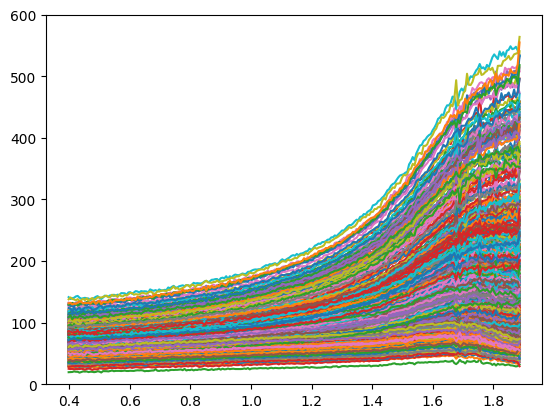

In [69]:
#plot all intensities

plt.figure()

for i in range(np.size(I,0)):

    plt.plot(q[50:],I[i,50:])
plt.ylim([0, 600])